## Devon Richtsmeier
## PHYS 555 - Machine Learning

## Initial data selection and evaluation


### Import the necessary Python packages including:
* numpy for the array capabilities
* pandas for data visualization and manipulation
* matplotlib for plotting
* scikit-learn for its data processing and feature extraction

In [2]:
import sys
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

sns.set_style('whitegrid')

# Regression Data

Of the various types of the skin cancer melanoma is the most serious as it has a great propensity to metastasize and spread to other parts of the body. In 2015, 3.1 million people globally were living with melanoma, which led to 59,800 deaths (https://analyticsindiamag.com/melanoma-tumor-size-prediction-weekend-hackathon-15/?ref=morioh.com&utm_source=morioh.com). Unfortunately, as seen in the image below, melanoma can appear very differently between patients, which can easily lead to misdiagnosis. The first step in the diagnosis of the melanoma is an exam by your doctor in which they will ask the patient about symptoms and when the mark appeared and how it has changed in size or appearance, among other things (https://www.cancer.org/cancer/melanoma-skin-cancer/detection-diagnosis-staging/how-diagnosed.html). If it is determined to potentially be melanoma, a number of different biopsy options can be conducted to determine if it is, in fact, melanoma.

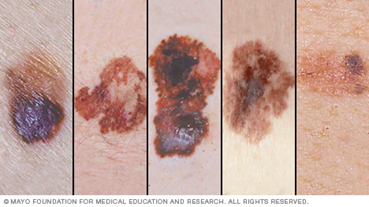

Another important aspect of melanoma, as it can easily spread to the rest of the body, is at what stage it is when diagnosed. This is dependent on the tumor size, as shown in the image below. The larger the tumor, the greater the chance it has reached the subcutaneous tissue and has spread. This cannot easily be determined without a biopsy or other procedure. 
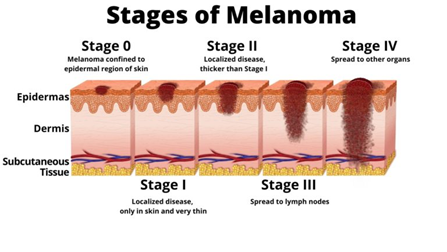
https://www.aimatmelanoma.org/stages-of-melanoma/

One potentialy solution is whether machine learning could determine the tumor size based on the surface characteristics of the melanoma. This would give doctors a better idea of the stage of the cancer quickly, which could expedite treatment for the patient.

The data set I'm interested in, which follows this idea, is from a MachineHack Hackathon and consists of the 9,146 patients, each with nine features which describe the surface characteristics of the melanoma. The target is the size of the tumor in each of the cases. The features and target are described below.

* mass_npea:  the mass of the area understudy for melanoma tumor
* size_npear: the size of the area understudy for melanoma tumor
* malign_ratio: ration of normal to malign surface understudy
* damage_size: unrecoverable area of skin damaged by the tumor
* exposed_area: total area exposed to the tumor
* std_dev_malign: standard deviation of malign skin measurements
* err_malign: error in malign skin measurements
* malign_penalty: penalty applied due to measurement error in the lab
* damage_ratio: the ratio of damage to total spread on the skin
* tumor_size: size of melanoma_tumor (target)

The data can be found here: https://www.kaggle.com/anmolkumar/machine-hack-melanoma-tumor-size-prediction

I'm interested in seeing which features are most deterministic of tumor size.

In [3]:
# Load the melanoma data using pandas
skin_data = pd.read_csv('skin_cancer.csv')

# Display the first 5 rows of data
skin_data.head(n=5)

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.487,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.881,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.093,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.015,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.414,3263.35,57,35.0200,18.023


## Display information about the data to see if cleaning is necessary

In [4]:
skin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mass_npea       9146 non-null   float64
 1   size_npear      9146 non-null   float64
 2   malign_ratio    9146 non-null   float64
 3   damage_size     9146 non-null   float64
 4   exposed_area    9146 non-null   float64
 5   std_dev_malign  9146 non-null   float64
 6   err_malign      9146 non-null   float64
 7   malign_penalty  9146 non-null   int64  
 8   damage_ratio    9146 non-null   float64
 9   tumor_size      9146 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 714.7 KB


## Look at some descriptive statistics of the data

In [5]:
# Set pandas to output only to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Look at the statistics of the columns
skin_data.describe()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
count,9146.00,9146.00,9146.00,9146.00,9146.00,9146.00,9146.00,9146.00,9146.00,9146.00
mean,9903.05,3032.83,0.30,103.90,1372441.96,146.30,3992.94,69.85,34.46,7.72
std,4060.58,1462.33,0.06,55.46,564677.29,70.51,1780.67,55.79,5.97,6.09
min,2864.76,510.53,0.11,10.31,387853.40,31.97,1089.19,0.00,15.23,0.00
25%,6988.42,1983.66,0.26,64.01,959687.26,95.85,3177.68,31.00,30.29,2.32
50%,8895.97,2684.33,0.30,88.46,1237057.06,126.14,3846.32,54.00,35.25,5.06
75%,12119.95,3830.74,0.34,134.21,1693083.24,182.25,4664.58,91.00,38.81,13.34
max,36995.40,13535.00,0.53,346.42,4978616.04,528.89,91983.70,340.00,46.55,21.00


## Look at histograms of the data columns

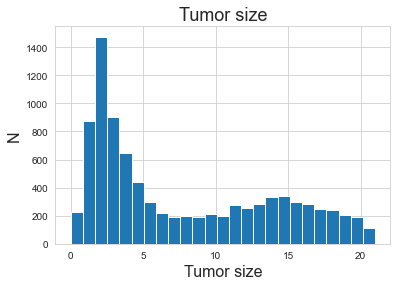

In [11]:
# Target: maximum heart rate achieved
skin_data['tumor_size'].hist(bins=25, figsize=(6, 4))
plt.title('Tumor size',fontsize=18)  # Title
plt.xlabel("Tumor size",fontsize=16)     # x-axis label
plt.ylabel("N",fontsize=16)       # y-axis label
plt.show()

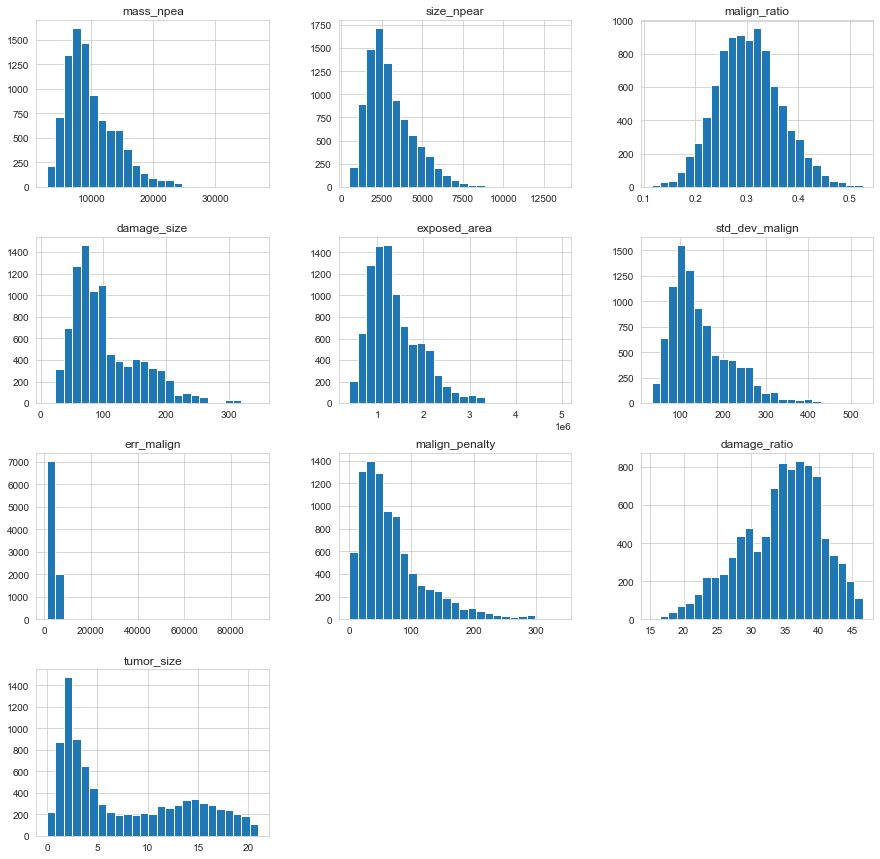

In [22]:
# All data histograms so that we can look at the distributions before and after normalization

skin_data.hist(bins=25, figsize=(15, 15))
plt.show()

## Set the input and target data
Target data is 'tumor_size' or the size of the skin cancer tumor

Also double check the size of the input and target arrays are the same

In [13]:
# Set the input and target data
input_skin = skin_data[['mass_npea', 'size_npear', 'malign_ratio', 'damage_size', 'exposed_area', 'std_dev_malign', 
                        'err_malign', 'malign_penalty', 'damage_ratio']].values
target_skin = skin_data[['tumor_size']].values

# Print the shapes of the data to make sure the size is the same (number of rows)
print(f'Input shape: {np.shape(input_skin)}')
print(f'Target shape: {np.shape(target_skin)}')

Input shape: (9146, 9)
Target shape: (9146, 1)


## Normalize the data and make sure the distribution is the same as above

In [16]:
# Apply a standard normalization to the input data
stnd_scaler = StandardScaler().fit(input_skin)
stnd_scaler.fit(input_skin)
input_skin_stnd = stnd_scaler.transform(input_skin)

# Apply a standard normalization to the target data
stnd_scaler_tar = StandardScaler().fit(target_skin)
stnd_scaler_tar.fit(target_skin)
target_skin_stnd = stnd_scaler_tar.transform(target_skin)

## Show the normalized target distribution

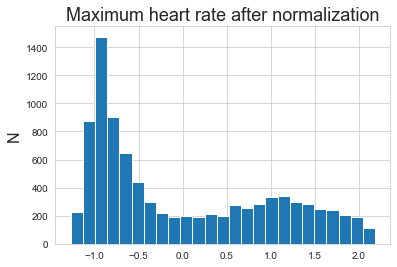

In [17]:
# Show the normalized target distribution
plt.hist(target_skin_stnd, 25)
plt.title('Maximum heart rate after normalization',fontsize=18)  # Title
plt.ylabel("N",fontsize=16)  # y-axis label
plt.show()

## Show the normalized feature distributions

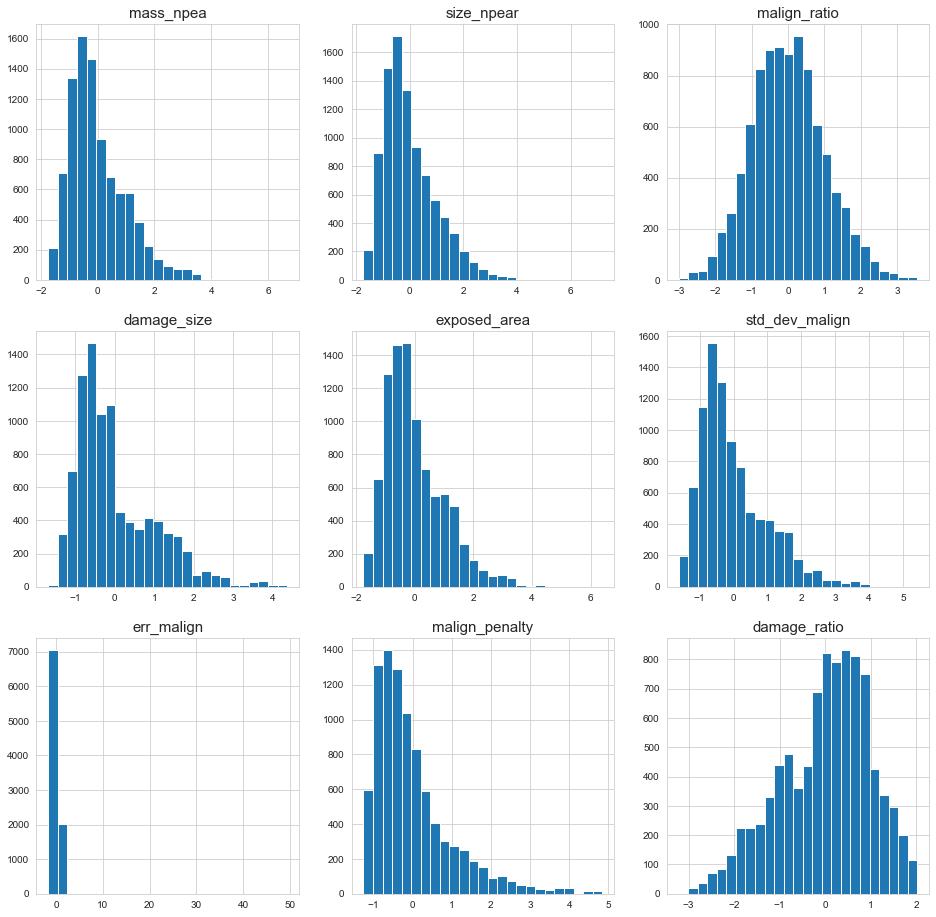

In [19]:
# Titles for the various subplots
titles = ['mass_npea', 'size_npear', 'malign_ratio', 'damage_size', 'exposed_area', 'std_dev_malign', 
          'err_malign', 'malign_penalty', 'damage_ratio']

# Create the figure
fig, axes = plt.subplots(3, 3, figsize=(16, 16))
for i, ax in enumerate(axes.flatten()):
    ax.hist(input_skin_stnd[:, i], 25)  # Plot the histogram
    ax.set_title(titles[i], fontsize=15)  # Set the title for each subplot
plt.show()